# What attributes can colleges measure in applicants to identify students who need support to be successful after graduation?

## Setup

Importing `fastai` for plotting and DL funtionality.

In [111]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import re
import site
site.addsitedir('C:\\Users\\Collin\\fastai\\')

In [32]:
from fastai.imports import *

In [33]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

Specifying our working path.

In [105]:
path = "C:\\Users\\Collin\\Documents\\GMU Hacks\\hackathon-els-data-and-variables\\"

Creating `csv` dataframes with `pandas`

In [174]:
data = pd.read_csv(path+"hackathon_els_data_set.csv")
#head specifes the first 5 rows of data
data.head()

,F3BYPNLWT,STU_ID,SCH_ID,STRAT_ID,PSU,F1SCH_ID,F1UNIV1,F1UNIV2A,F1UNIV2B,F2UNIV_P,...,F3TZYR2GPA,F3VOTEBEH,F3WYGED1,F3WYGED2,F3WYGED3,F3WYGED4,F3WYGED5,F3WYGED6,PSTSCWT,PSWT
0,185.4780,101101,1011,101,1,1011,101,1,1,103,...,-9.0,-9,-3,-3,-3,-3,-3,-3,225.4814,212.9278
1,220.1699,101107,1011,101,1,1011,101,1,1,101,...,-4.0,1,-3,-3,-3,-3,-3,-3,0.0000,0.0000
2,0.0000,101110,1011,101,1,-8,107,1,7,105,...,-8.0,-4,-3,-3,-3,-3,-3,-3,0.0000,0.0000
3,150.7823,101113,1011,101,1,1011,101,1,1,102,...,-9.0,-9,-3,-3,-3,-3,-3,-3,165.6192,143.0561
4,219.5727,101114,1011,101,1,1011,101,1,1,102,...,3.5,-9,-3,-3,-3,-3,-3,-3,295.5941,237.3833


In [36]:
variables = pd.read_csv(path+"hackathon_els_variables.csv")
variables.head()

,Var_Name,Var_Label
0,F3BYPNLWT,"Panel weight, BY and F3 (2002 and 2012)"
1,STU_ID,Analysis case ID
2,STU_ID,Student ID
3,SCH_ID,School ID
4,SCH_ID,School ID of course school


In [43]:
raw = pd.read_csv(path+"hackathon_raw_all_ps_inst.csv")
raw.head()

,STU_ID,F3ILEVEL,F3ICNTRL,F3ISECTR,F3ISTDATE,F3IFIRSTINST,F3ILASTINST,F3ICREDNUM,F3ICREDTYPE_1,F3ICREDDATE_1,F3ICREDGEN_1,F3ICREDDBLMAJ_1
0,101101,2,1,4,2005,1,0,0,-3,-3,-3,-3
1,101101,1,3,3,2010,0,0,0,-3,-3,-3,-3
2,101101,1,3,3,2010,0,1,0,-3,-3,-3,-3
3,101102,1,1,1,2004,1,0,0,-3,-3,-3,-3
4,101102,1,3,3,2006,0,0,0,-3,-3,-3,-3


# Investigation

## Validation Set

Here we are selecting factors in which to test our highschool variables against. We'll start off looking at 'F3ERN2011' which indicates the income of participants in 2011.

In [179]:
income = pd.DataFrame(data['F3ERN2011'].copy())
income.insert(0,"STU_ID",data["STU_ID"])
income.insert(0,"SCH_ID",data["SCH_ID"])
income

,SCH_ID,STU_ID,F3ERN2011
0,1011,101101,4000
1,1011,101107,35000
2,1011,101110,-4
3,1011,101113,0
4,1011,101114,20000
5,1011,101117,-4
6,1011,101119,-4
7,1011,101120,1000
8,1011,101123,0
9,1011,101124,-4


Let's see the distrobution of incomes.

In [79]:
data.F3ERN2011.value_counts()

-4         2488
 0         1534
 30000      594
 20000      594
 25000      502
-8          459
 40000      432
 15000      399
 35000      395
 10000      364
 12000      305
 50000      287
 45000      253
 18000      249
 32000      245
 28000      242
 24000      238
 60000      217
 22000      210
 5000       187
 27000      185
 14000      183
 17000      172
 16000      172
 26000      172
 38000      171
 2000       167
 42000      157
 36000      152
 8000       152
           ... 
 44000       58
 1200        58
 100         57
 58000       57
 300         53
 105000      48
 68000       47
 41000       45
 54000       43
 3500        42
 700         42
 500         41
 85000       37
 56000       36
 62000       35
 47000       35
 53000       33
 855         32
 63000       31
 5500        31
 49000       31
 12500       31
 72000       31
 120000      31
 9500        30
 4500        30
 160000      30
 19500       30
 22500       30
 250000      30
Name: F3ERN2011, Length:

In [102]:
data.F3ERN2011.describe()

count     16197.000000
mean      21275.874298
std       23908.721869
min          -8.000000
25%           0.000000
50%       17000.000000
75%       33000.000000
max      250000.000000
Name: F3ERN2011, dtype: float64

'-8' and '-4' don't really make sense in terms of income, so let's see what portion of partipants have been assigned these values.

In [93]:
data.F3ERN2011.value_counts().loc[-4]

2488

In [91]:
data.F3ERN2011.value_counts().loc[-8]

459

In [92]:
data.F3ERN2011.value_counts().loc[0]

1534

In [98]:
weird_entries = 2488 + 459 + 1534

In [99]:
other_entries = data.F3ERN2011.value_counts().sum() - weird_entries
other_entries

11716

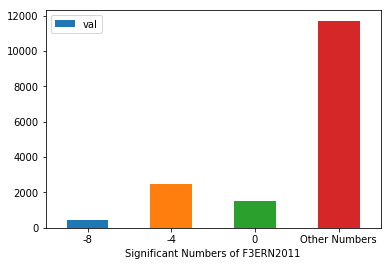

In [100]:
df = pd.DataFrame({'Significant Numbers of F3ERN2011':[-8,-4,0,'Other Numbers'], 'val':[data.F3ERN2011.value_counts().loc[-8],data.F3ERN2011.value_counts().loc[-4],data.F3ERN2011.value_counts().loc[0],other_entries]})
ax = df.plot.bar(x='Significant Numbers of F3ERN2011', y='val', rot=0)

According to a document labeled 'Education Longitudinal Study of 2002 (ELS:2002) Third Follow-Up Data File Documentation' availible [here](https://nces.ed.gov/pubs2014/2014364.pdf),

> values of -8 indicate “survey component legitimate skip”

and

> values of -4 indicate “nonrespondent”

## Test Set

Now, we want to filter out all data that deals with 2011 since we already have a measure of 'success', being income of 2011 participants.

According to the 'Education Longitudinal Study of 2002:  Base Year Data File User’s Manual' in sec 6.5, 'Naming Conventions': 
>Most variables begin with an indicator of the wave (in this case, the base year, BY)

therefore we will disregard all other columns with the execption of the `STU_ID` and `SCH_ID` since we are only concerned with the base data

In [163]:
#Lets create a new dataframe with only the values containing 'BY'
baseyear = data.copy()
baseyear = baseyear.filter(regex='^BY', axis=1)
baseyear.insert(0,"STU_ID",data["STU_ID"])
baseyear.insert(0,"SCH_ID",data["SCH_ID"])

In [164]:
baseyear

,SCH_ID,STU_ID,BY10FLP,BYA04,BYA05,BYA06,BYA07,BYA08,BYA09,BYA10,...,BYTXPAFG,BYTXRIRR,BYTXRQU,BYTXRSTD,BYTXSTAT,BYURBAN,BYWORKSY,BYWRKHRS,BYWRTNGA,BYXTRACU
0,1011,101101,5,1,2,3,180,9,40,8,...,1,39.806,4,59.53,3,1,1,6,1.191,1
1,1011,101107,5,1,2,3,180,9,40,8,...,1,11.698,1,28.85,3,1,0,0,-0.630,0
2,1011,101110,5,1,2,3,180,9,40,8,...,1,24.362,2,45.73,3,1,-9,-9,-1.116,1
3,1011,101113,5,1,2,3,180,9,40,8,...,1,21.358,1,43.02,3,1,0,0,0.241,0
4,1011,101114,5,1,2,3,180,9,40,8,...,1,21.055,1,42.78,3,1,1,6,0.436,2
5,1011,101117,5,1,2,3,180,9,40,8,...,1,13.907,1,33.78,3,1,1,2,-1.384,0
6,1011,101119,5,1,2,3,180,9,40,8,...,0,34.353,3,54.11,3,1,0,0,-1.384,0
7,1011,101120,5,1,2,3,180,9,40,8,...,1,23.857,2,45.36,3,1,0,0,1.001,0
8,1011,101123,5,1,2,3,180,9,40,8,...,1,25.090,2,46.35,3,1,0,0,-0.703,0
9,1011,101124,5,1,2,3,180,9,40,8,...,1,12.551,1,31.07,3,1,1,6,-0.143,0


NameError: name 'display_all' is not defined